# Bank Telemarketing Campaign Case Study.
In this presentation we will do Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable to understand why EDA is a most important step in the process of Machine Learning.

### Problem Statement:

Bank conduct some telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers and in order to increase its overall revenue. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

 WE need to apply our knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

### Approach: 
In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.
Clean the data: remove irrelevant columns, deal with missing and incorrect values, duplicate values.
Use Exploratry Data Analysis to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

### Attribute Information:

Input variables:
#### Bank client data:
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'married', 'single', 'divorced'; note: 'divorced' means divorced or widowed)
4.  education (categorical:'primary', 'secondary', 'tertiary', 'unknown')
5.  default: has credit in default? (categorical: 'no','yes')
6.  balance: balance of the customer
7.  housing: has housing loan? (categorical: 'no','yes')
8.  loan: has personal loan? (categorical: 'no','yes')
#### Related with the last contact of the current campaign:
9.  contact: contact communication type (categorical: 'cellular', 'unknown', 'telephone')
10.  month: last contact month of year (categorical: 'oct','may','apr','jun','feb','aug','jan','jul','nov','sep','mar','dec')
11. days: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15.  previous: number of contacts performed before this campaign and for this client (numeric)
16.  poutcome: outcome of the previous marketing campaign (categorical: 'unknown', 'failure', 'other', 'success')

Output variable (desired target):
17.  y: has the client subscribed a term deposit? (binary: 'yes','no')

#### Reading the datasets

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("bank.csv", sep = ";") # reading the data files
df2 = pd.read_csv("bank-full.csv", sep=';')

In [3]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data = pd.concat([df1, df2], axis=0, join='inner') #mergimg the two dataframe
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
data.rename(columns = {'y':'term_deposit'}, inplace = True)

#### Bascic Exploration
##### Target
1.   Drop Duplicate Values
2.   Finding missing values
3.   Checking for 0 values in the dataset
4.   Exploring Categorical and Numrerical columns



In [7]:
data[data.index.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,37,blue-collar,married,secondary,no,362,yes,no,unknown,20,may,277,2,-1,0,unknown,no
4517,33,blue-collar,married,primary,no,163,yes,no,unknown,20,may,135,1,-1,0,unknown,no
4518,40,blue-collar,married,primary,no,-740,yes,no,unknown,20,may,126,3,-1,0,unknown,no
4519,38,services,married,secondary,no,434,yes,no,unknown,20,may,411,1,-1,0,unknown,no


In [8]:
data = data[~data.index.duplicated()]   ## droping the duplicates

In [9]:
data.shape

(45211, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  term_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.964986,1414.297627,16.247174,257.599102,2.806463,44.274402,0.634580
std,10.716245,3093.706999,8.486896,257.671539,3.131041,104.123204,2.357141
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,75.000000,9.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,474.000000,17.000000,178.000000,2.000000,-1.000000,0.000000
75%,48.000000,1503.000000,22.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


#### 1. Finding missing values


In [12]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64



*   It seems there is no null values in the dataset though we have to check for 0 values





#### 2.  Checking for 0 values in the dataset


In [13]:
(data == 0).sum()

age                 0
job                 0
marital             0
education           0
default             0
balance          3605
housing             0
loan                0
contact             0
day                 0
month               0
duration            3
campaign            0
pdays               0
previous        36138
poutcome            0
term_deposit        0
dtype: int64



*   Its showing that balance and previous columns have 7.7% and 81.75% 0 values.
*   We can drop the "Previous" column as this column is number of contacts
    performed before this campaign.


In [14]:
data=data.drop(['previous'], axis=1) # droping the column
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,unknown,no


In [15]:
(data == 0).sum()

age                0
job                0
marital            0
education          0
default            0
balance         3605
housing            0
loan               0
contact            0
day                0
month              0
duration           3
campaign           0
pdays              0
poutcome           0
term_deposit       0
dtype: int64


*  There is no missing values anymore excepct duration (3), its considerable




#### 3.   Exploring Categorical and Numrerical columns


>  Univarite Analysis Of Categorial and Numerical columns
 
>  Bivariate Analysis Of Categrical and Numerical Columns with Label "tem-deposit"





In [16]:
data.nunique() # total unique values in columns

age               77
job               12
marital            3
education          4
default            2
balance         7016
housing            2
loan               2
contact            3
day               31
month             12
duration        1533
campaign          46
pdays            559
poutcome           4
term_deposit       2
dtype: int64

#### Univarite Analysis Of Categorial and Numerical columns

In [17]:
cat=data.select_dtypes(include=['object']).columns.tolist() # to get categorical columns
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'term_deposit']

In [18]:
num=data.select_dtypes(exclude=['object']).columns.tolist()  #to get numerical columns
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']



*   There is 10 Categorical columns and 6 Numerical columns



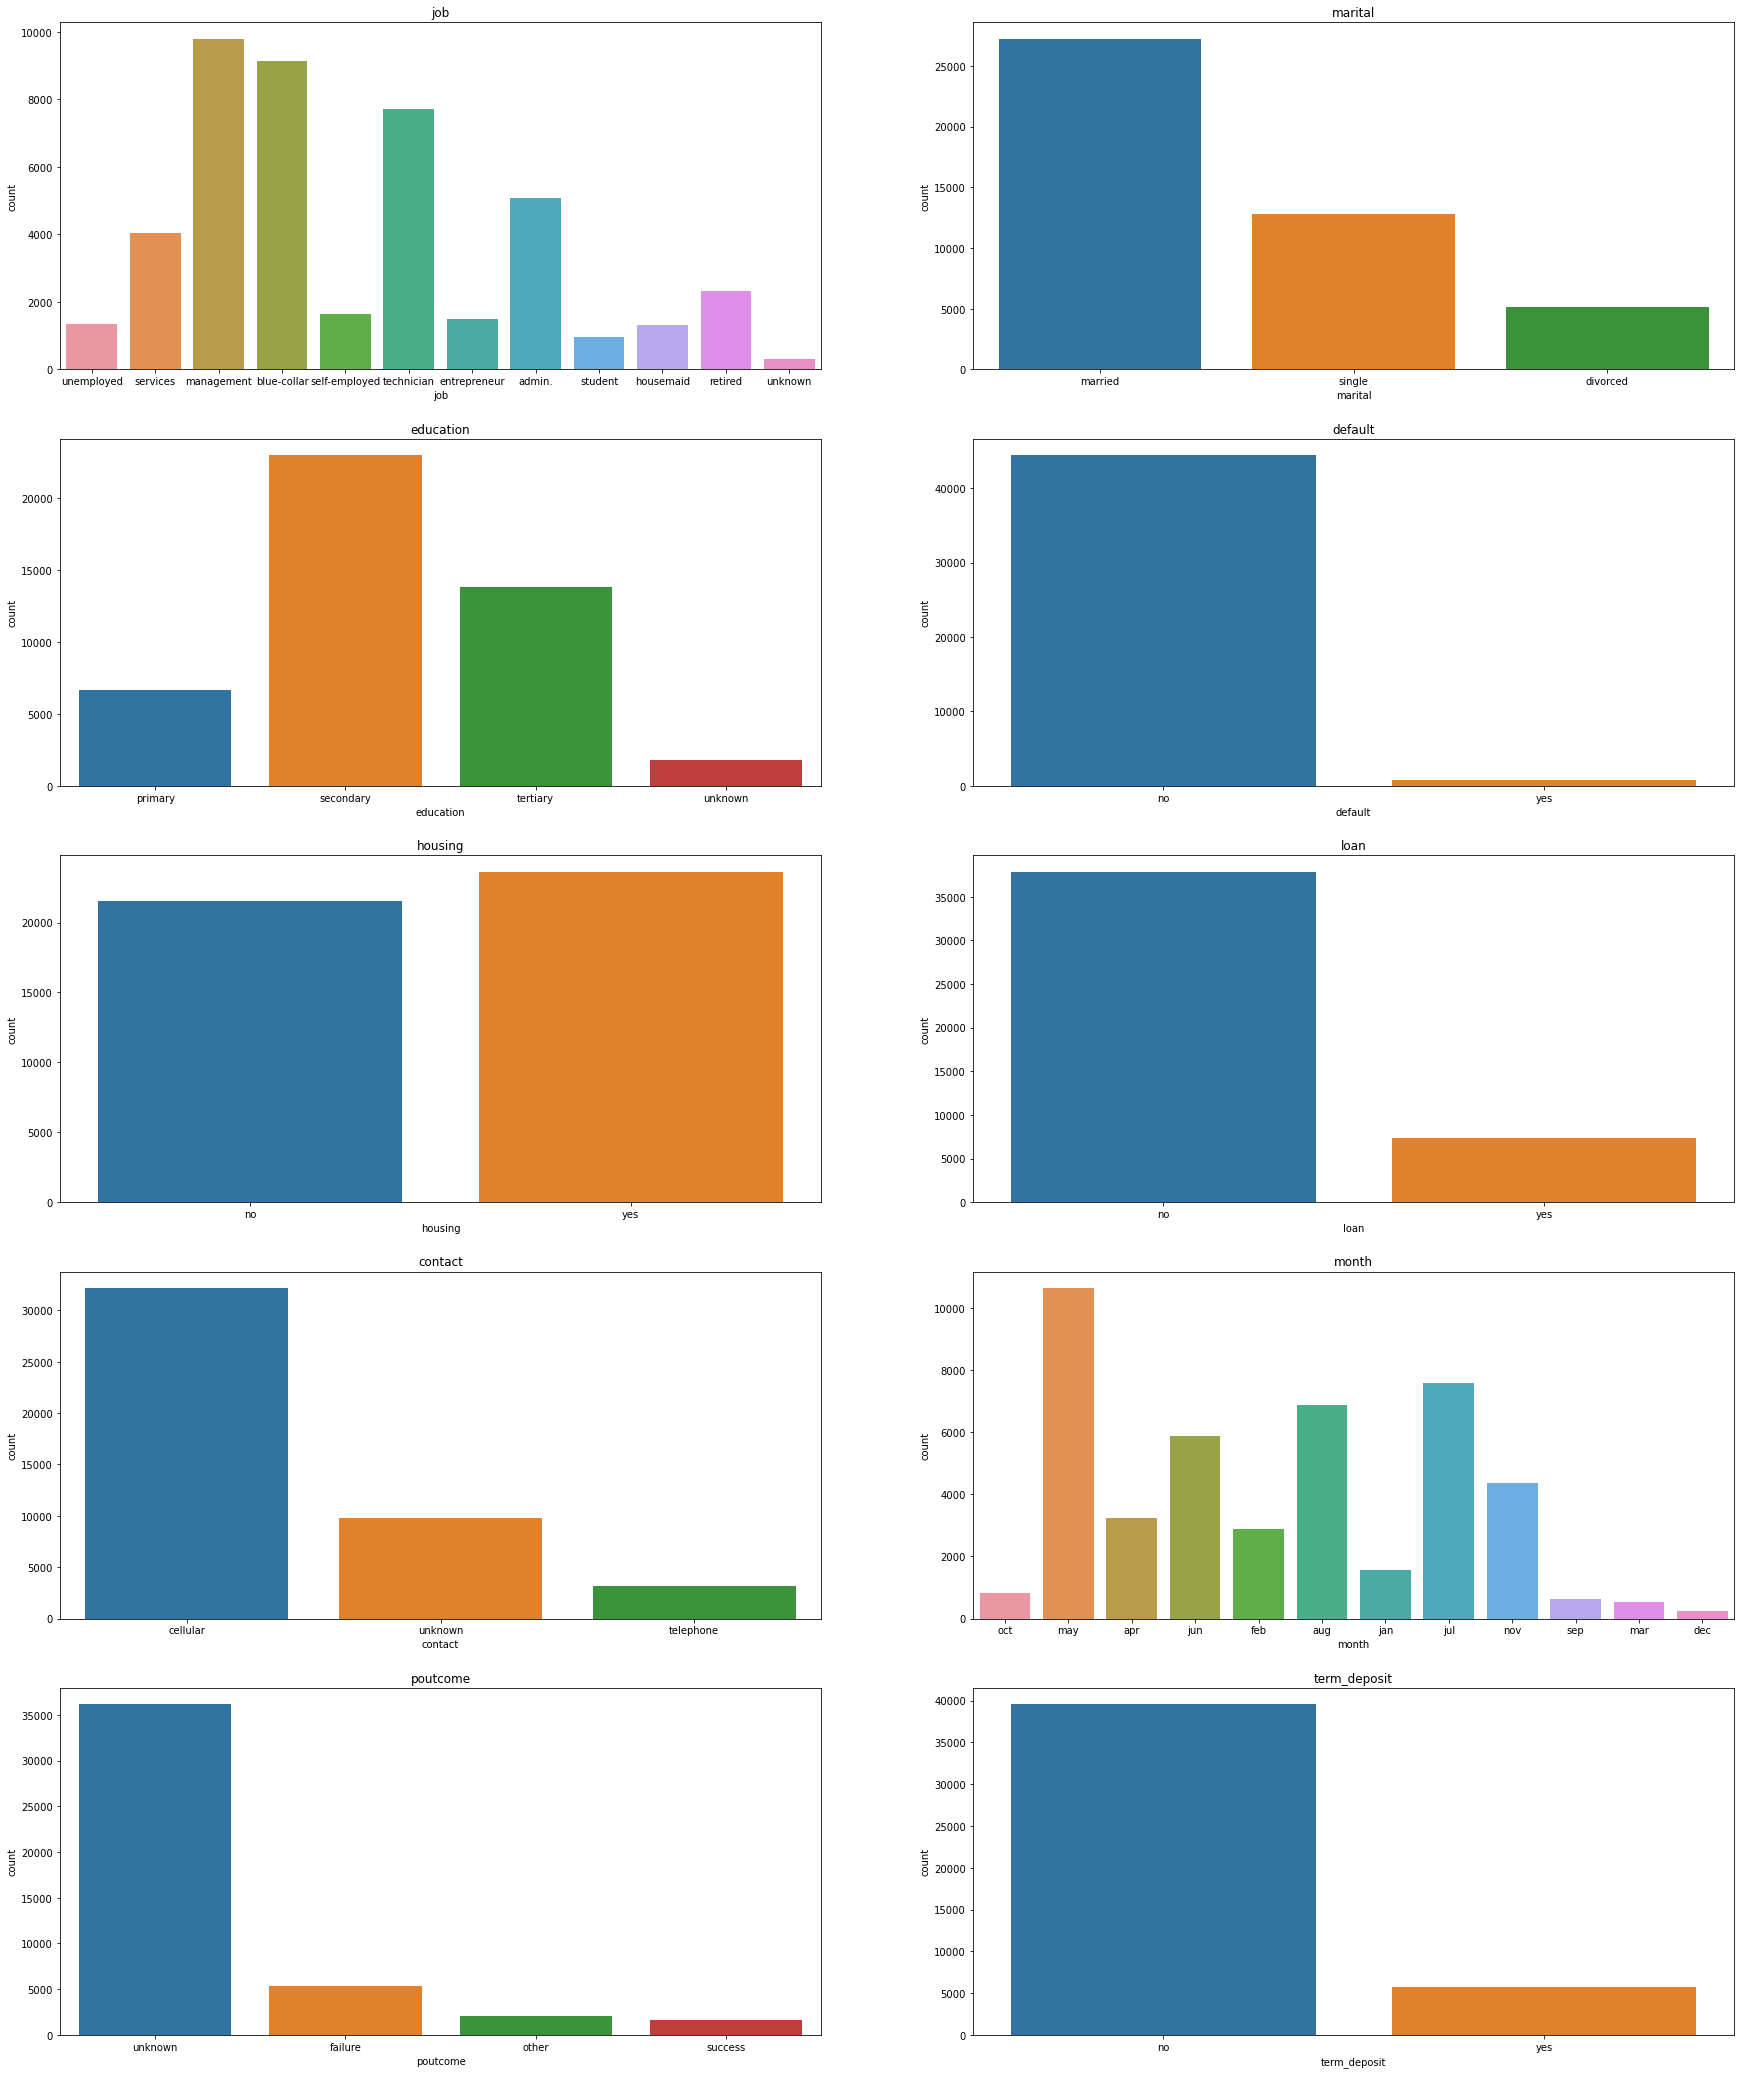

In [19]:
plt.figure(figsize=(30,60), facecolor="white")
plotnumber = 1 
for cat_feature in cat: #irerating to get all the categorical column's plot from 'cat' where we stored all categorical column before
  ax=plt.subplot(8,2,plotnumber) 
  sns.countplot(x=cat_feature,data=data)
  plt.xlabel(cat_feature) 
  plt.title(cat_feature)
  plotnumber+=1

plt.show()



*   client with job type as management records are high in given dataset and student are very less
*   client who married are high in records in given dataset and divorced are less
*   client whoes education background is secondary are in high numbers in given dataset
*   defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
*   data in month of may is high and less in dec

C:\Users\RITZZY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RITZZY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RITZZY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

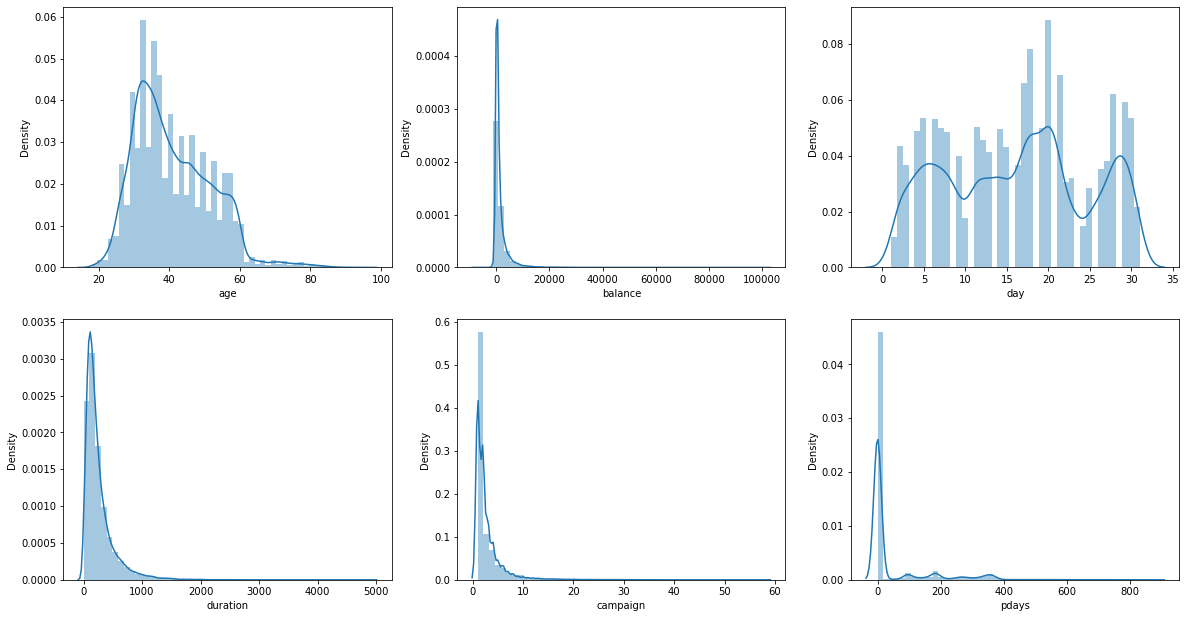

In [20]:
#ploting a univariate distribution
plt.figure(figsize=(20,68), facecolor="white")
plotnumber =1 
for con_feature in num:     #irerating to get all the numeric column's plot from 'num' where we stored all numerical column before
  ax = plt.subplot(12,3,plotnumber) 
  sns.distplot(data[con_feature]) 
  plt.xlabel(con_feature) 
  plotnumber+=1

plt.show()



*   It seems Age, days distributed normally
*   But balance,duration, campaign, pdays heavely skwed  towards right.



#### Bivariate Analysis Of Categrical and Numerical Columns with respect to outcome "term_deposit"

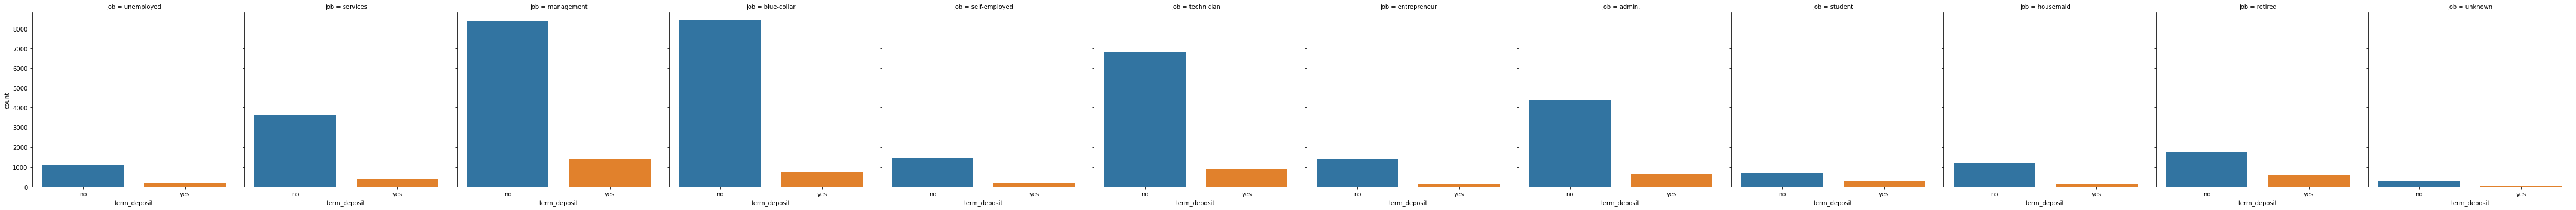

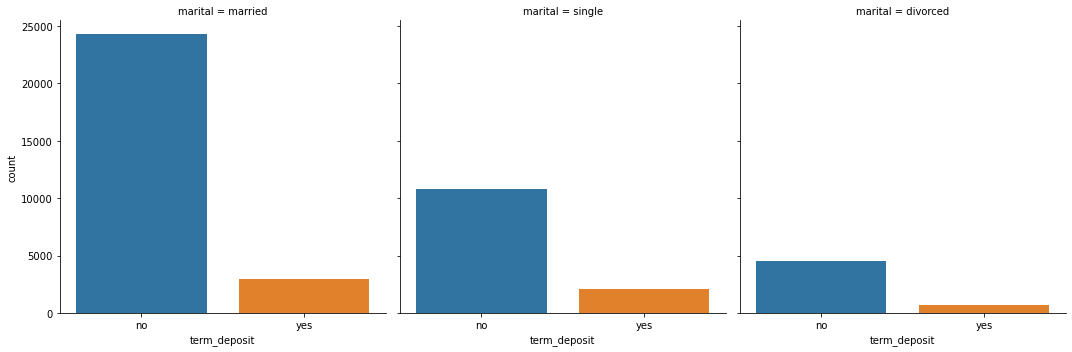

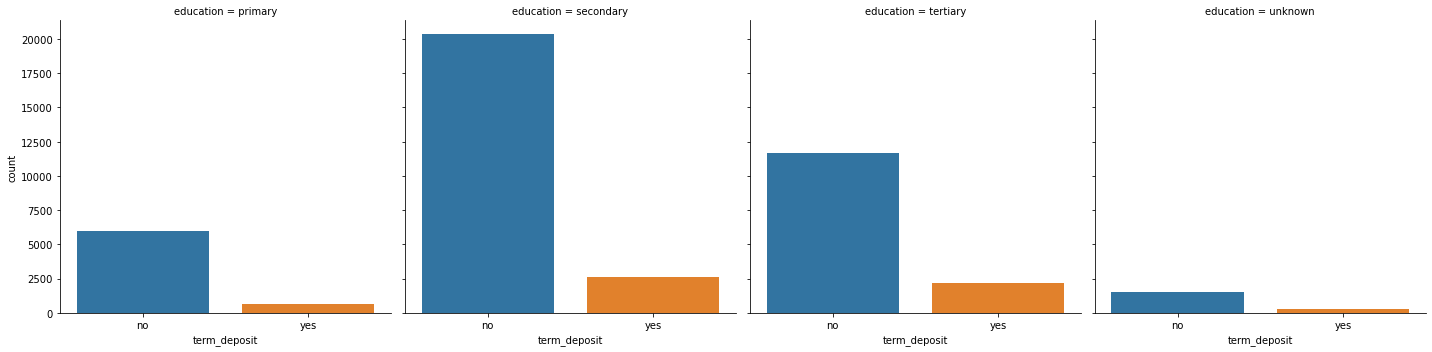

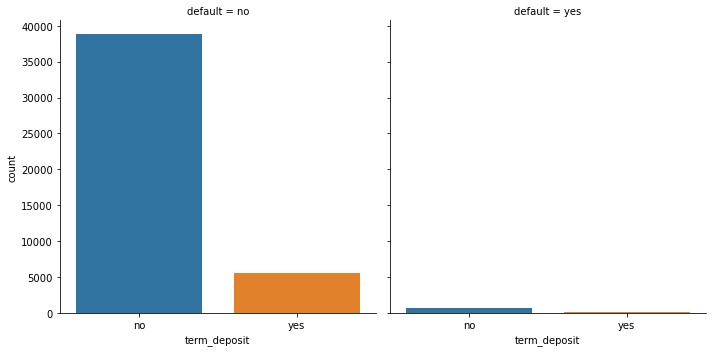

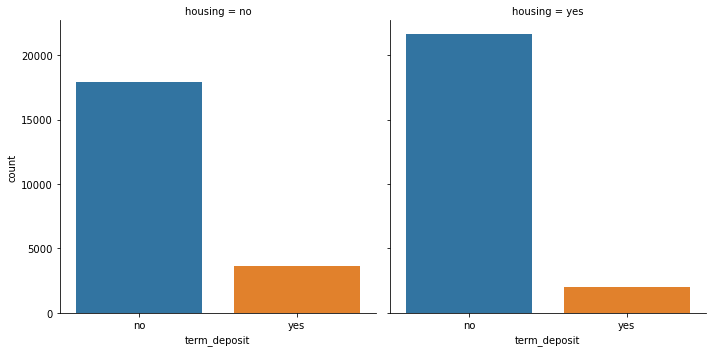

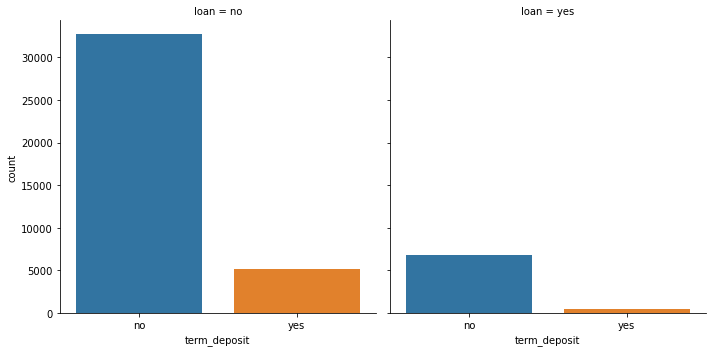

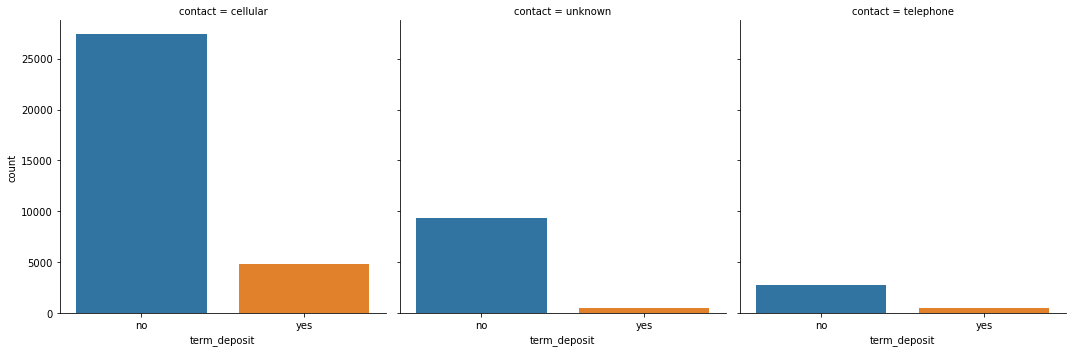

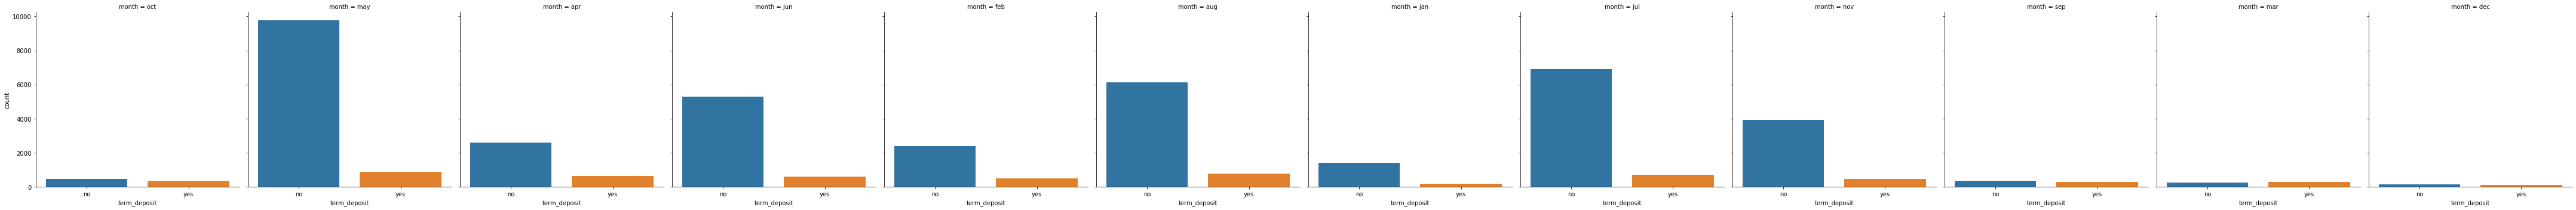

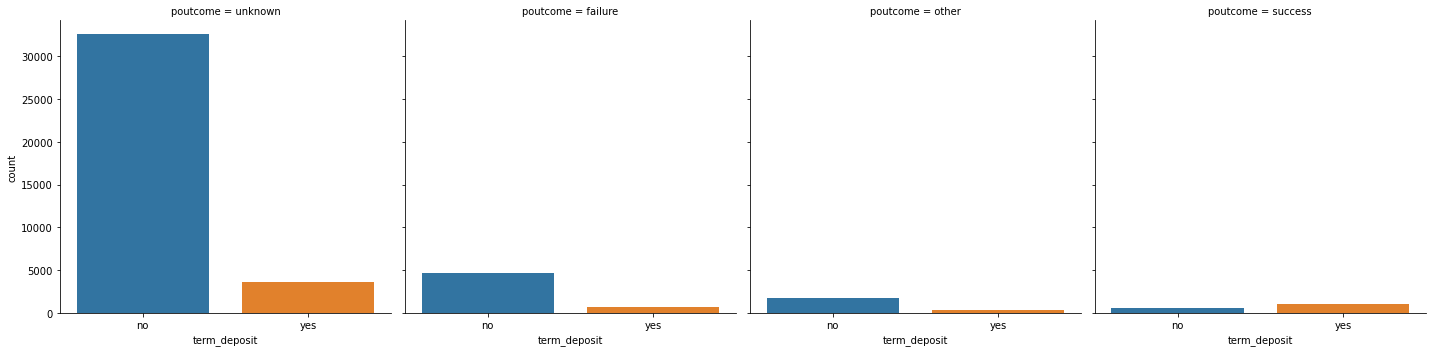

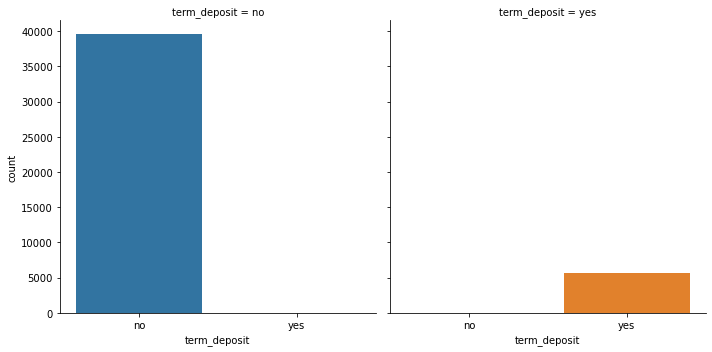

In [21]:
for cat_feature in cat:  #to get iteration of categorical column's from 'cat' where we stored all categorical column before
  sns.catplot(x='term_deposit', col= cat_feature, kind='count',data=data) # ploting iterations with y 

plt.show()


*   management client has high interest on deposit
*   client who has housing loan seems to be not interested much on deposit
*   if pre campagin outcome that is poutcome-success then, there is high chance of client to show interest on deposit
*   in month of March. September, October and December, client show high interest to deposit
*   in month of may, records are high but client interst ratio is very less



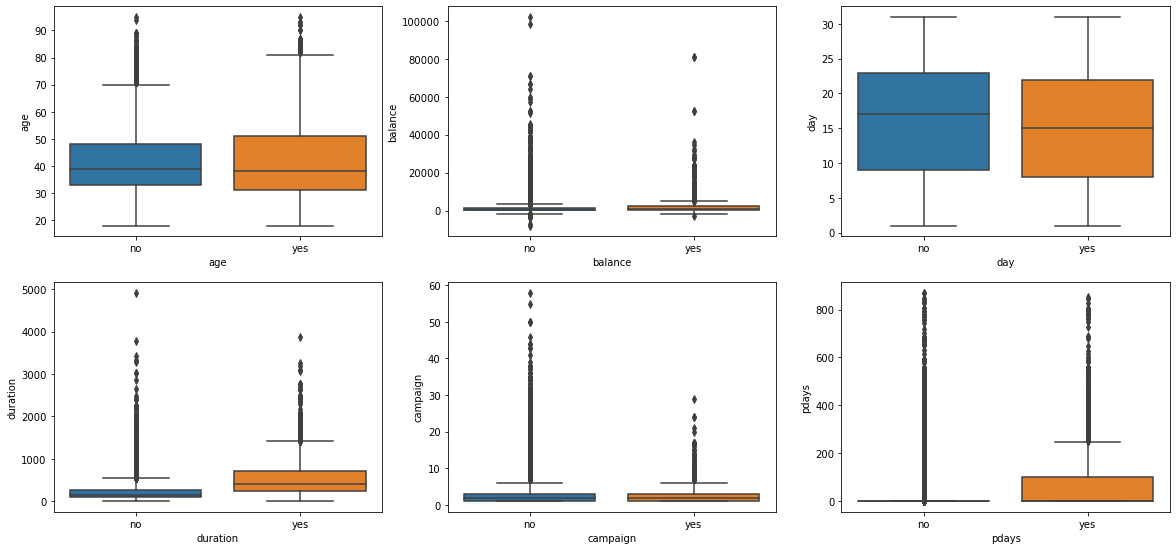

In [22]:
#boxplot to show target distribution with respect numerical features 
plt.figure(figsize=(20,60), facecolor="white")
plotnumber = 1 
for feature in num: #to get iteration of numerical column's from 'cat' where we stored all numerical column before
  ax= plt.subplot(12,3,plotnumber) 
  sns.boxplot(x="term_deposit", y= data[feature], data=data)  # ploting iterations with y 
  plt.xlabel(feature)
  plotnumber+=1

plt.show()



*   age, balance, duration,campaign and pdays has some outliers




## Feature Engineering



*   from above study there is no missing value
*   we can drop default feature
*   but some coumns have outliers (age, balance, duration, campaign and pdays) as well as skewed data



In [23]:
data_new= data.copy()
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,unknown,no


In [24]:
data_new.groupby(['term_deposit','default']).size() 

term_deposit  default
no            no         38800
              yes          736
yes           no          5616
              yes           59
dtype: int64

In [25]:
data_new.drop(['default'], axis=1, inplace= True) ## dropping the default column

In [26]:
data_new.groupby(['term_deposit','pdays']).size()

term_deposit  pdays
no            -1       32552
               1           9
               2          42
               3           2
               4           1
                       ...  
yes            804         2
               805         1
               828         1
               842         1
               854         1
Length: 914, dtype: int64

* here -1 is 36938 times i.e. 36% , too much outliers and also pdays is not an important column, so we can drop it 

In [27]:
data_new.drop(['pdays'], axis=1, inplace= True) ## dropping pdys column

In [28]:
data_new.groupby('age',sort= True)['age'].count() ##data distribution of age column using groupby

age
18     12
19     39
20     48
21     78
22    123
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

* age is 18 to 95, which is normal, so we dont drop age column

In [29]:
data_new.groupby('balance',sort= True)['balance'].count()  ##data distribution of balance column using groupby

balance
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     2
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7016, dtype: int64

* minus balance because of due , its possible . so we dont drop the balance column

In [30]:
data_new.groupby(['term_deposit','duration'], sort= True)['duration'].count()  ##data distribution of duration column using groupby

term_deposit  duration
no            0            3
              1            2
              2            2
              3            2
              4           15
                          ..
yes           3094         1
              3102         1
              3183         1
              3253         1
              3881         1
Name: duration, Length: 2560, dtype: int64

In [31]:
Q1 = np.percentile(data_new['duration'], 25, interpolation = 'midpoint')  ##lower quartile
Q2 = np.percentile(data_new['duration'], 50, interpolation = 'midpoint')  ##middle quartile 
Q3 = np.percentile(data_new['duration'], 75, interpolation = 'midpoint')  ##upper quartile

In [32]:
IQR = Q3 - Q1  
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR   ##setting lower limit
up_lim = Q3 + 1.5 * IQR    ##setting upper limit
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data_new['duration']:   ## itteration for duration
    if ((x> up_lim) or (x<low_lim)): ## if data is greater than upper limit and less than lower limit
         outlier.append(x)           ## then append the data as outliers
print(' outlier in the dataset is', outlier) ## printing the outliers

Interquartile range is 217.0
low_limit is -223.5
up_limit is 644.5
 outlier in the dataset is [897, 958, 765, 1018, 1740, 701, 652, 736, 779, 1877, 676, 768, 1337, 654, 834, 768, 690, 673, 1097, 699, 988, 1030, 1484, 772, 783, 799, 1370, 1017, 1434, 1065, 681, 1212, 1816, 854, 722, 748, 1735, 1407, 738, 904, 1713, 661, 792, 682, 651, 3025, 819, 668, 1031, 700, 1181, 770, 767, 854, 986, 1282, 1199, 736, 1663, 676, 1259, 1015, 761, 667, 717, 882, 957, 654, 1028, 1168, 748, 820, 2087, 754, 891, 1130, 860, 756, 968, 763, 766, 648, 688, 1030, 803, 945, 1178, 936, 731, 670, 671, 650, 747, 799, 883, 684, 686, 1060, 724, 712, 753, 1081, 1083, 757, 653, 883, 935, 773, 653, 785, 952, 1174, 915, 937, 1063, 758, 847, 1558, 789, 712, 860, 1441, 1259, 1504, 796, 1126, 697, 931, 650, 1034, 659, 727, 753, 1210, 646, 716, 1029, 755, 971, 1275, 1032, 808, 923, 661, 762, 819, 657, 1309, 1056, 908, 819, 827, 735, 691, 669, 1473, 1386, 910, 1366, 1532, 766, 955, 1236, 809, 1164, 674, 712, 1126, 709, 955, 9

In [33]:
data_new=data_new[data_new['duration']<644.5] ## dropping the outlires


<AxesSubplot:ylabel='duration'>

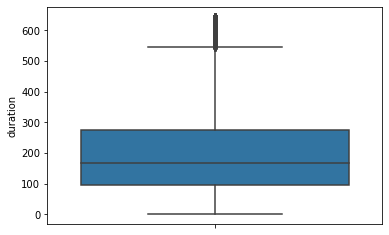

In [34]:
sns.boxplot(y=data_new['duration'])

In [35]:
data_new.groupby(['term_deposit','campaign'], sort= True)['campaign'].size()

term_deposit  campaign
no            1           14032
              2           10503
              3            4635
              4            3076
              5            1592
                          ...  
yes           15              3
              16              1
              17              3
              20              1
              21              1
Name: campaign, Length: 63, dtype: int64

In [36]:
Q1 = np.percentile(data_new['campaign'], 25, interpolation = 'midpoint')  ## lower quartile
Q2 = np.percentile(data_new['campaign'], 50, interpolation = 'midpoint')  ## middle quartile
Q3 = np.percentile(data_new['campaign'], 75, interpolation = 'midpoint')  ## upper quartile

In [37]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR  ## setting lower limit
up_lim = Q3 + 1.5 * IQR   ## setting upper limit
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data_new['campaign']:         ## itteration for campaign
    if ((x> up_lim) or (x<low_lim)):   ## if data is greater than upper limit and less than lower limit
             outlier.append(x)         ## then append the data as outlier                            
print(' outlier in the dataset is', outlier)    ## printing the outliers                                 

Interquartile range is 2.0
low_limit is -2.0
up_limit is 6.0
 outlier in the dataset is [18, 10, 9, 7, 12, 14, 7, 7, 12, 13, 7, 11, 7, 7, 8, 24, 10, 8, 10, 9, 29, 13, 32, 9, 13, 13, 10, 7, 7, 8, 8, 13, 10, 8, 10, 7, 16, 13, 10, 9, 9, 8, 8, 8, 22, 7, 11, 12, 13, 22, 8, 11, 7, 11, 11, 13, 7, 16, 9, 18, 14, 15, 7, 12, 10, 7, 8, 8, 8, 7, 7, 8, 9, 16, 15, 7, 9, 30, 7, 11, 25, 9, 11, 7, 13, 21, 15, 11, 8, 7, 7, 11, 8, 13, 11, 7, 17, 8, 12, 8, 8, 7, 7, 7, 8, 12, 12, 9, 11, 8, 14, 7, 14, 12, 7, 9, 12, 8, 10, 8, 10, 7, 8, 18, 7, 17, 8, 19, 12, 8, 7, 7, 10, 24, 7, 14, 8, 16, 12, 12, 8, 9, 8, 14, 9, 17, 10, 25, 15, 7, 10, 14, 25, 17, 25, 9, 7, 13, 10, 9, 23, 8, 17, 20, 9, 9, 8, 50, 9, 10, 12, 10, 12, 7, 9, 12, 11, 9, 10, 8, 10, 10, 11, 7, 7, 11, 7, 7, 8, 13, 7, 28, 11, 11, 18, 16, 15, 8, 18, 10, 32, 7, 11, 14, 18, 8, 7, 9, 8, 7, 7, 8, 31, 18, 8, 8, 8, 7, 7, 19, 7, 8, 17, 7, 11, 9, 12, 16, 7, 15, 7, 7, 16, 7, 8, 9, 8, 7, 10, 8, 8, 7, 9, 8, 9, 21, 7, 7, 12, 7, 8, 10, 7, 10, 28, 7, 7, 28, 11, 23, 8,

In [38]:
data_new=data_new[data_new['campaign']<7] ##dropping the outliers

<AxesSubplot:ylabel='campaign'>

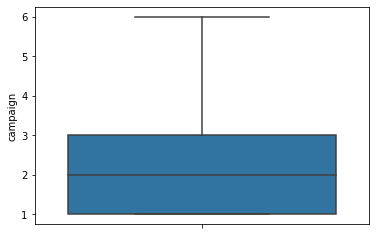

In [39]:
sns.boxplot(y=data_new['campaign']) ## plotting to check outliers

### Bivariate Analysis on cleaned Data

In [40]:
data_new.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,term_deposit
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,unknown,no


<AxesSubplot:xlabel='age', ylabel='Count'>

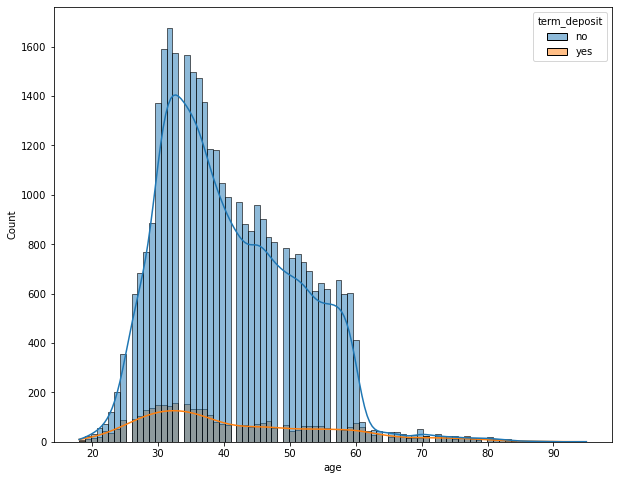

In [41]:
plt.figure(figsize=(10,8))
sns.histplot(x="age", hue="term_deposit", data=data_new, kde=True) ## histogram on age with hue term_deposite





*   Most people didn't take the term deposit
*   people aged 25-40 took the term deposit



<AxesSubplot:xlabel='job', ylabel='Count'>

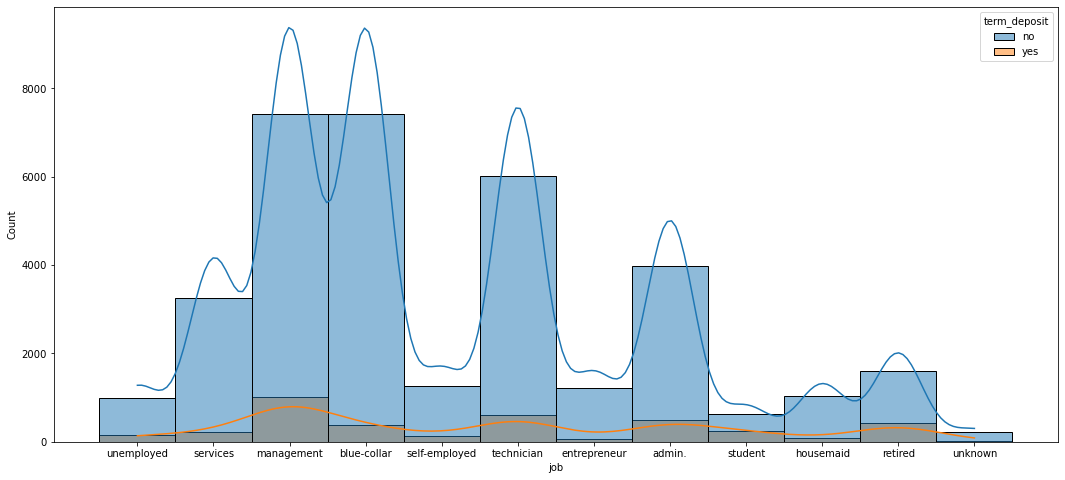

In [42]:
plt.figure(figsize=(18,8))
sns.histplot(x="job", hue="term_deposit", data=data_new, kde=True)  ## histogram on job with hue term_deposite



*   blue-coller in job group didnt take the term most
*   management poeple took the term most



<AxesSubplot:xlabel='marital', ylabel='Count'>

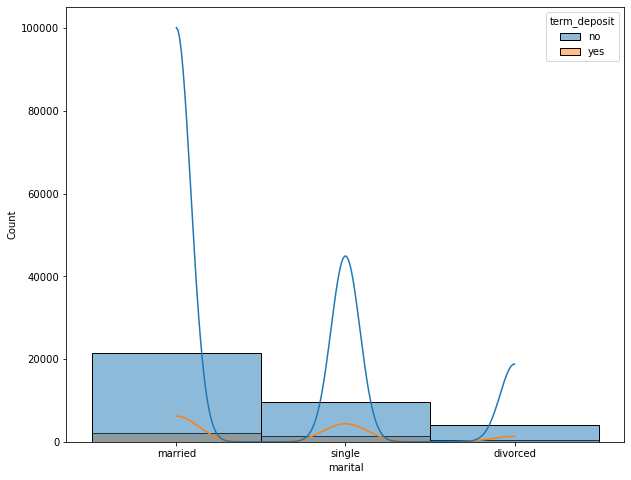

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(x="marital", hue="term_deposit", data=data_new, kde=True) ## histogram on marital with hue term_deposite



*   married people took the term and didnt took the term most comparing to single and divorced



<AxesSubplot:xlabel='education', ylabel='Count'>

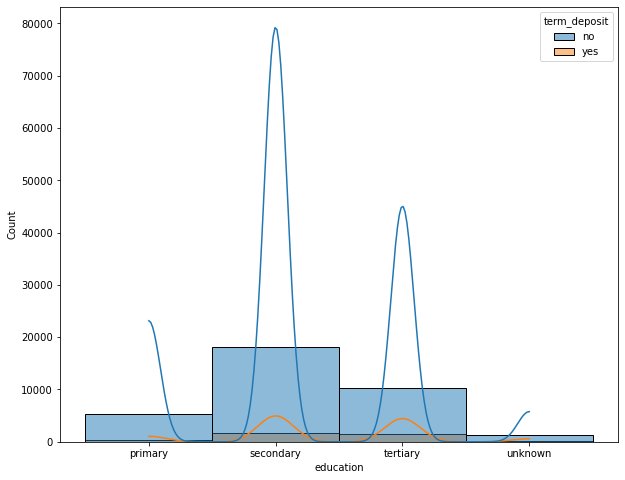

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(x="education", hue="term_deposit", data=data_new, kde=True)  ## histogram on education with hue term_deposite



*   secondary education people took the term most and also secodary education people didnt took the course




<AxesSubplot:xlabel='balance', ylabel='Count'>

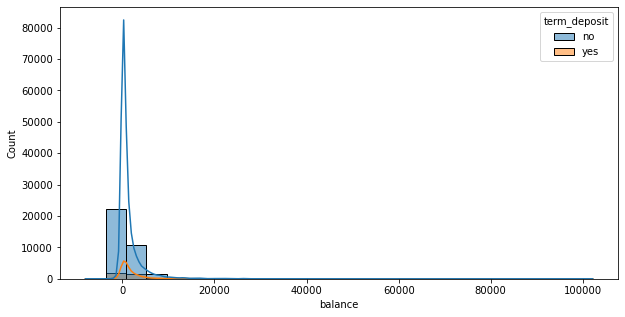

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(x="balance", hue="term_deposit", bins=25, data=data_new, kde=True)  ## histogram on balance with hue term_deposite


In [46]:
data.groupby('term_deposit')['balance'].count()

term_deposit
no     39536
yes     5675
Name: balance, dtype: int64


*   most people with balance high or less said no the term
*   only 5000 people said yes balance with high or less





<AxesSubplot:xlabel='housing', ylabel='Count'>

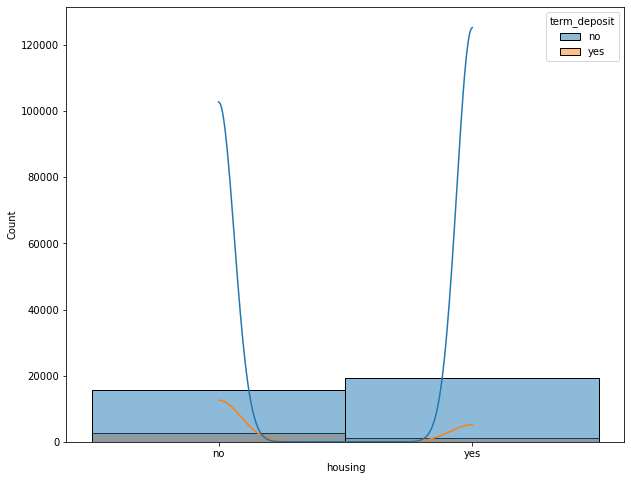

In [47]:
plt.figure(figsize=(10,8))
sns.histplot(x="housing", hue="term_deposit", data=data_new, kde=True)  ## histogram on housing with hue term_deposite



*  most People with own houses said no 
  



<AxesSubplot:xlabel='loan', ylabel='Count'>

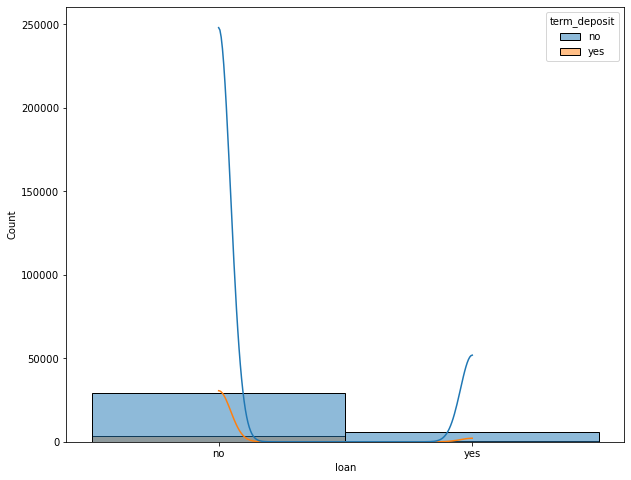

In [48]:
plt.figure(figsize=(10,8))
sns.histplot(x="loan", hue="term_deposit", data=data_new, kde=True) ## histogram on loan with hue term_deposite



*   most people who took the loan said yes
  



<AxesSubplot:xlabel='contact', ylabel='Count'>

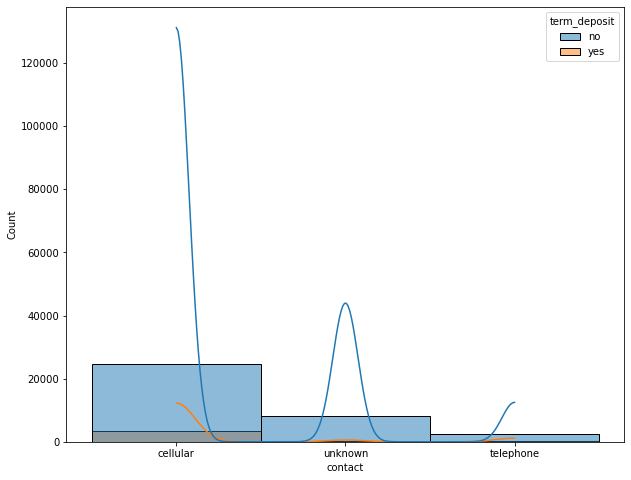

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(x="contact", hue="term_deposit", data=data_new, kde=True)    ## histogram on contact with hue term_deposite



*  people with cellular contact took the term deposit most




<AxesSubplot:xlabel='day', ylabel='Count'>

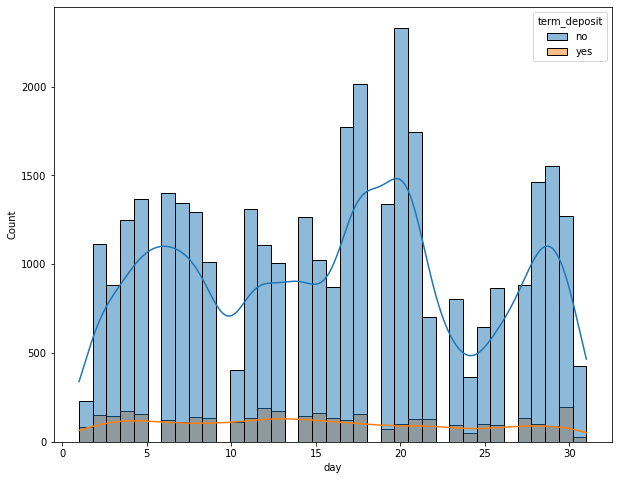

In [50]:
plt.figure(figsize=(10,8))
sns.histplot(x="day", hue="term_deposit", data=data_new, kde=True)   ## histogram on day with hue term_deposite

*   most people didnt take the term, how many days concated with them


<AxesSubplot:xlabel='month', ylabel='Count'>

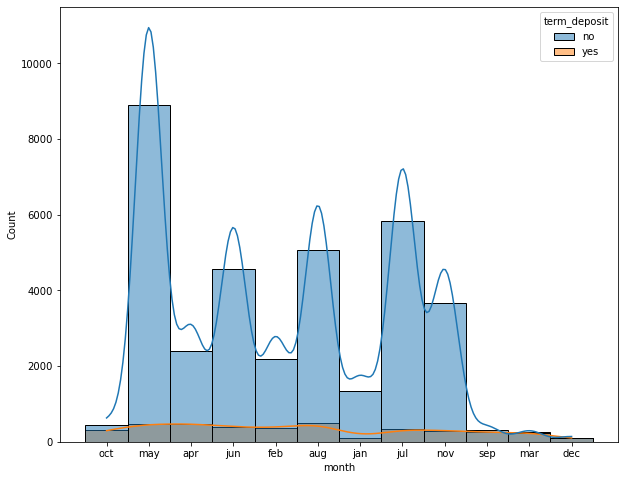

In [51]:
plt.figure(figsize=(10,8))
sns.histplot(x="month", hue="term_deposit", data=data_new, kde=True)   ## histogram on month with hue term_deposite



*  term deposit was taken almost evenly for the all months by few people



<AxesSubplot:xlabel='duration', ylabel='Count'>

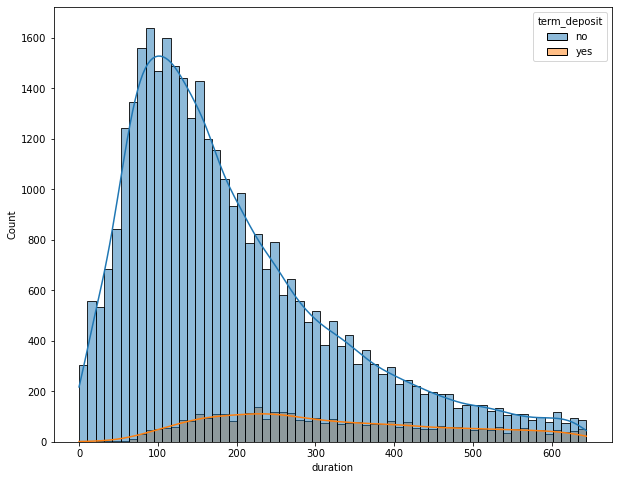

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(x="duration", hue="term_deposit", data=data_new, kde=True)    ## histogram on duration with hue term_deposite



*   people with call long duration didnt take term rather people who was in the call for less time took the term




<AxesSubplot:xlabel='campaign', ylabel='Count'>

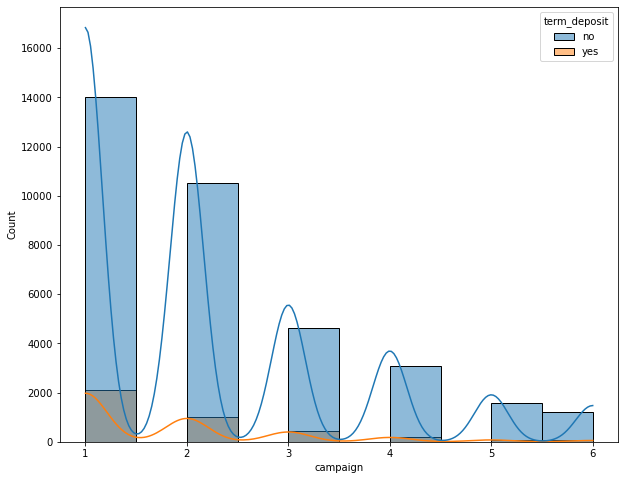

In [53]:
plt.figure(figsize=(10,8))
sns.histplot(x="campaign", hue="term_deposit", bins=10, data=data_new, kde=True)  ## histogram on campaign with hue term_deposite



*  count of 1900 who was contacted during the campaign most took the term



### Conclusion
The analysis conclusion for future marketing campaigns:

* Customers from age categories above 50 years old, in future campaigns should be targeted on . 
* From next campaignes unemployed, services, entrepreneur,housemaid should more focus on these job category.
* Married people have more positive responses for deposit but single and divorced didn't responded much.
* Secondary education people responded more for deposit. Primary and tetiary people should be focused on.
* Only a few people , near 5000 said yes to the term, most of the people balance is high or less said no, people with more       balance should be targeted from next to take the term-deposite.
* People with houses should be priotized for future campaign .
* As tellphone people are less in number and cellular people are more, Mode of contact should be cellular as they also responed   more.  .
* In The month of august,may,april,june was most of the marketing activity. and in winter season january, september,december,     october activity is less.So, for future campaign marketing activity should be increase in winter season.
* people who have higher call duration taken the term most, So, when increasing call duration will also increase the deposit     rate.



**As most People did not take the Term-deposit, future marketing campaigns should be planned and should apply on the above conclusions more, as well as on whole parts to gain high deposite rate and maximum profit.  


## MySQL Connection

In [54]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pymysql

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='root',
                             db='bank')

In [36]:
print(connection)

In [37]:
cursor=connection.cursor()

In [39]:
cursor = connection.cursor()
cursor.execute("select database();")
record = cursor.fetchone()
print("You're connected to database: ", record)
#cursor.execute('DROP TABLE IF EXISTS bank_data;')
print('Creating table....')
# in the below line please pass the create table statement which you want #to create
cursor.execute("CREATE TABLE bank_data(`age` int DEFAULT NULL,`job` varchar(45) DEFAULT NULL,`marital` varchar(45) DEFAULT NULL,`education` varchar(45) DEFAULT NULL,`balance` int DEFAULT NULL,`housing` varchar(45) DEFAULT NULL,`loan` varchar(45) DEFAULT NULL,`contact` varchar(45) DEFAULT NULL,`day` int DEFAULT NULL,`month` varchar(45) DEFAULT NULL,`duration` int DEFAULT NULL,`campaign` int DEFAULT NULL,`poutcome` varchar(45) DEFAULT NULL,`term_deposit` varchar(45) DEFAULT NULL)")
print("Table is created....")
        #loop through the data frame
for i,row in data_new.iterrows():
            #here %S means string values 
            sql = "INSERT INTO bank.bank_data VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)" #no of column %s
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            connection.commit()
        

You're connected to database:  ('bank',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record 

In [41]:
cursor.execute("select * from bank_data")

41951